## matplotlibの使い方メモ

matplotlibの使い方をメモしておきます。新しい使い方を覚えるごとに更新していきます。

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/article/library/matplotlib/mat_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/article/library/matplotlib/mat_nb.ipynb)

### 筆者の環境
筆者のOSはmacOSです。LinuxやUnixのコマンドとはオプションが異なります。

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G2022


In [2]:
!python -V

Python 3.7.3


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)

matplotlib version : 3.0.3
scipy version : 1.4.1
numpy version : 1.16.2


## 簡単なグラフを書く

$y = \sin x$の関数を書いてみます。マニアックな使い方が色々あるようですが、データ分析の仕事をしていると、この形で使うことが一番多いような気がしています。グリッドやラベルの設定は重要です。matplotlibの中にtexを使えるかどうかは環境による気がします。

- plt.grid()
- plt.title()
- plt.xlabel()
- plt.ylabe()
- plt.xlim()
- plt.legend()

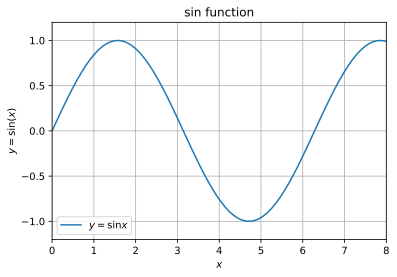

In [4]:
x = np.linspace(0,10,100)
y = np.sin(x)

plt.grid()
plt.title("sin function")
plt.xlabel("$x$")
plt.ylabel("$y = \\sin(x)$")
plt.xlim(0,8)
plt.ylim(-1.2,1.2)
plt.plot(x,y,label="$y=\\sin x$")

plt.legend()

## 複数のグラフを書く


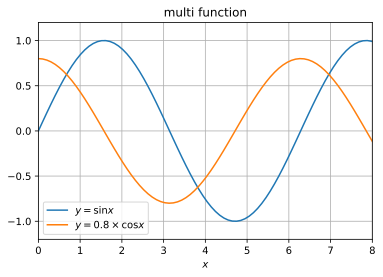

In [5]:
x = np.linspace(0,10,100)
y1 = np.sin(x)
y2 = 0.8 * np.cos(x)

plt.grid()
plt.title("multi function")
plt.xlabel("$x$")
plt.xlim(0,8)
plt.ylim(-1.2,1.2)
plt.plot(x,y1, label="$y = \\sin x$")
plt.plot(x,y2, label="$y = 0.8 \\times \\cos x$")
plt.legend()